# Algoritmos de detección de la comunidad#
Los algoritmos de detección de comunidad se utilizan para evaluar cómo se agrupan o particionan los grupos de nodos, así como su tendencia a fortalecerse o separarse.
Esto significa qué tan densamente conectados están los nodos dentro de una comunidad, en comparación con lo conectados que estarían en una red aleatoria.
Los algoritmos de detección de comunidades cumplen con una función de gran.
## Algoritmo de Louvain
El algoritmo de Louvain es un algoritmo que permite
detectar comunidades tomando como eje central de su funcionamiento los postulados de la modularidad de los datos. Este algoritmo evalúa el conjunto de datos y contrasta la densidad de las aristas que se presentan en la comunidad sean internas o externas.
Una particularidad de este algoritmo es que se aplica en dos pasos. Con esto se busca estructurar la comunidad de
datos conectados. Como primer paso se desarrolla una asignación directa sobre los nodos que conformarán la comunidad, favoreciendo optimizaciones locales de modularidad, Posteriormente se define una nueva red de datos, tomando como base las comunidades detectadas en su etapa inicial. Este proceso se repite las veces que sea necesaria hasta que no se puedan realizar reasignaciones nuevas.

## usos 

Este algoritmo posee propiedades extremadamente interesantes que permiten construir comunidades conectadas de datos muy útiles para encontrar datos relacionados dentro de sistemas de recomendación en linea. Un caso muy especifico sería la utilización del algoritmo para encontrar temas similares o relacionados dentro de un sitio web colaborativo.  También tiene su rango de aplicabilidad dentro de plataformas de contenidos o redes sociales como Twitter o Youtube sirviendo para analizar la coincidencia de términos en documentos o archivos, como parte del proceso de modelado de temas.
## ejemplo:
muestra las comunidades alas cuales puede perteneser

Captura de Pantalla 2020-06-13 a la(s) 18.45.05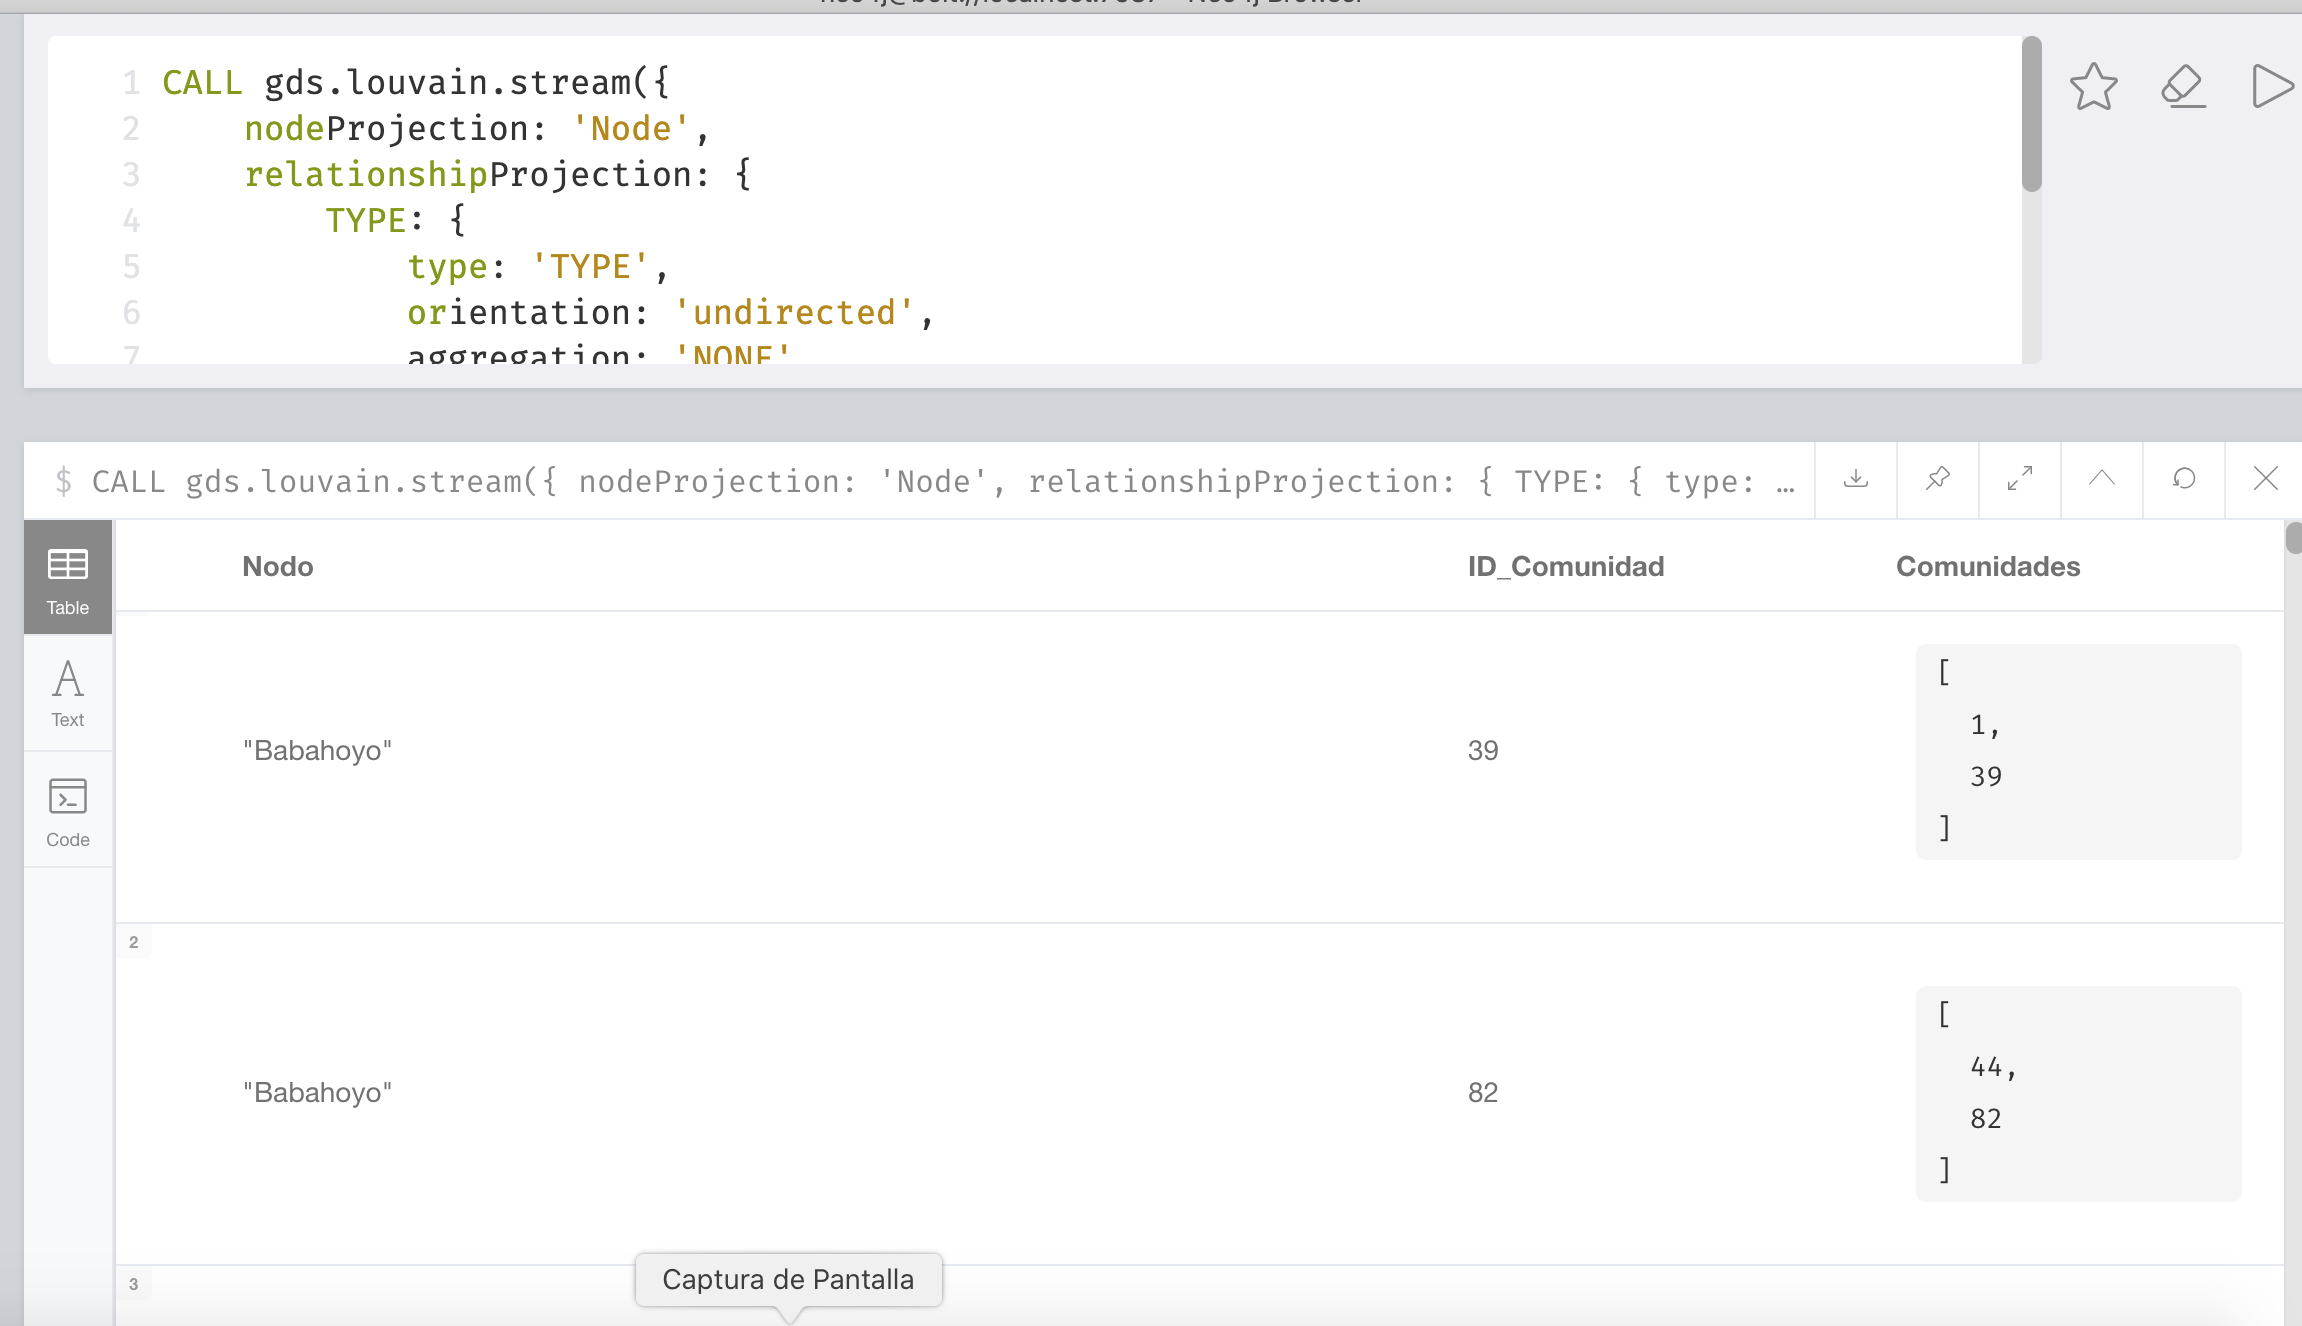

In [23]:
from neo4j import GraphDatabase

uri = "bolt://localhost:7687"
driver = GraphDatabase.driver(uri,auth=("neo4j", "p4t1t01234"),encrypted=False )


def get_friends_of(tx):
    friends = []
        
    result = tx.run("CALL gds.louvain.stream({ "
                    "nodeProjection: 'Node', "
                    "relationshipProjection: { "
                    "TYPE: {type: 'TYPE',"
                    "orientation: 'undirected',aggregation: 'NONE'}}, "
                    "includeIntermediateCommunities: true "
                    "}) YIELD nodeId, communityId, intermediateCommunityIds "
                    "RETURN gds.util.asNode(nodeId).name AS Nodo, communityId as ID_Comunidad, intermediateCommunityIds as Comunidades "
                    "ORDER BY Nodo ASC ")
    
    
    for record in result:
        friends.append(record['Nodo'])
        friends.append(record['Comunidades'])
    return friends

with driver.session() as session:
    friends = session.read_transaction(get_friends_of)
    for friend in friends:
        print(friend)

driver.close()

Babahoyo
[1, 39]
Babahoyo
[44, 82]
Babahoyo
[87, 125]
Babahoyo
[178, 216]
Caleta Bar y Grill
[25, 25]
Caleta Bar y Grill
[68, 68]
Caleta Bar y Grill
[111, 111]
Caleta Bar y Grill
[202, 202]
Club de Nutricion
[25, 25]
Club de Nutricion
[68, 68]
Club de Nutricion
[111, 111]
Club de Nutricion
[202, 202]
Colegio Bahia de Manta
[11, 11]
Colegio Bahia de Manta
[54, 54]
Colegio Bahia de Manta
[97, 97]
Colegio Bahia de Manta
[188, 188]
Colegio Manta
[11, 11]
Colegio Manta
[54, 54]
Colegio Manta
[97, 97]
Colegio Manta
[188, 188]
Colegio Republica de Manta
[11, 11]
Colegio Republica de Manta
[54, 54]
Colegio Republica de Manta
[97, 97]
Colegio Republica de Manta
[188, 188]
Colegio Tarqui Manta
[11, 11]
Colegio Tarqui Manta
[54, 54]
Colegio Tarqui Manta
[97, 97]
Colegio Tarqui Manta
[188, 188]
Colegios
[11, 11]
Colegios
[54, 54]
Colegios
[97, 97]
Colegios
[188, 188]
Colombia Pizza
[25, 25]
Colombia Pizza
[68, 68]
Colombia Pizza
[111, 111]
Colombia Pizza
[202, 202]
Don Fercho
[25, 25]
Don Fercho
[

## Mejoras
adquirir mas conosimiento y practica en el uso de estos algoritmos 
## conclusiones
Cada algoritmo implementado en neoj4 tiene sus características únicas las cuales pueden ser usadas en diferentes ámbitos del mundo informantico y laboral .
## travajos a futuro
aplicar este tipo de algoritmos para la creacion de sistemas mas efisientes y automaticos en la recopilacion de informacion 